## Notebook 1 of 2 - Charts and Graphs

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [247]:
%matplotlib inline

In [248]:
seoul = pd.read_csv("Seoul_Data.csv")

In [249]:
#This is district level data for the city of Seoul. 
#There are twenty-six districts that make up Seoul. 

In [250]:
seoul=seoul.drop(range(26,1000))

In [251]:
seoul = seoul.drop(columns=['Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69','Unnamed: 70'])


In [252]:
pd.set_option('display.max_columns', None)

In [253]:
seoul;

# Comparing 3 districts noted to be gentrifying in Seoul to the city of Seoul overall. 

# Number of Retail Stores in Seoul and Districts of Interests 2015-2019

In [254]:
seoul.rename(columns={'Q2-15 Total Number of Stores':'2015 Number of Stores'});

In [255]:
districts_int = seoul.loc[[0,4,14,3],'Districts':'Q2-19 General Stores']

In [256]:
districts_int["Districts"]

0     Seoul (Overall)
4        Seongdong-gu
14            Mapo-gu
3          Yongsan-gu
Name: Districts, dtype: object

In [257]:
districts_int.T

,0,4,14,3
Districts,Seoul (Overall),Seongdong-gu,Mapo-gu,Yongsan-gu
Q2-15 Total Number of Stores,572646,15712,25764,18978
Q2-15 Franchise Stores,39103,1051,2017,973
Q2-15 General Stores,533543,14661,23747,18005
Q2-16 Total Number of Stores,576804,15953,26601,19089
Q2-16 Franchise Stores,40746,1108,2126,1041
Q2-16 General Stores,536058,14845,24475,18048
Q2-17 Total Number of Stores,581955,16422,27464,19084
Q2-17 Franchise Stores,42004,1159,2230,1046
Q2-17 General Stores,539951,15263,25234,18038


In [258]:
d_i = districts_int.T.drop("Districts")

In [259]:
d_i.reset_index(inplace = True)

In [260]:
# once we have the d_i table, we can use for loops to create total_num and franchise_store tables and then subplots 
# probably will have to save them first before plotting all
# can simplify the replace function here
nonfranchise_stores = d_i.iloc[[2, 5, 8, 11, 14], :]
nonfranchise_stores = total_stores.rename(columns = {"index":"Year"})
nonfranchise_stores = total_stores.replace(
    nonfranchise_stores["Year"].values, ["2015", "2016", "2017", "2018", "2019"])
nonfranchise_stores

,Year,0,4,14,3
0,2015,572646.0,15712.0,25764.0,18978.0
3,2016,576804.0,15953.0,26601.0,19089.0
6,2017,581955.0,16422.0,27464.0,19084.0
9,2018,572956.0,16505.0,27506.0,18911.0
12,2019,563435.0,16417.0,27504.0,18593.0


In [261]:
total_stores = d_i.iloc[[0, 3, 6, 9, 12], :]
total_stores = total_stores.rename(columns = {"index":"Year"})
total_stores = total_stores.replace(
    total_stores["Year"].values, ["2015", "2016", "2017", "2018", "2019"]
)
total_stores

,Year,0,4,14,3
0,2015,572646.0,15712.0,25764.0,18978.0
3,2016,576804.0,15953.0,26601.0,19089.0
6,2017,581955.0,16422.0,27464.0,19084.0
9,2018,572956.0,16505.0,27506.0,18911.0
12,2019,563435.0,16417.0,27504.0,18593.0


In [262]:
franchise_stores = d_i.iloc[[1, 4, 7, 10, 13], :]
franchise_stores = franchise_stores.rename(columns = {"index":"Year"})
franchise_stores = franchise_stores.replace(franchise_stores["Year"].values, ["2015", "2016", "2017", "2018", "2019"])

franchise_stores 

,Year,0,4,14,3
1,2015,39103.0,1051.0,2017.0,973.0
4,2016,40746.0,1108.0,2126.0,1041.0
7,2017,42004.0,1159.0,2230.0,1046.0
10,2018,41731.0,1187.0,2190.0,1051.0
13,2019,40773.0,1174.0,2118.0,1026.0


## Charts below focus on the City of Seoul and the the following districts within Seoul: 
## Seongdong-gu, Mapo-gu, Yongsan-gu

# Bar Charts Showing Percent Change of Total Number of Retail Stores From 2015 to 2019

In [263]:
total_stores

,Year,0,4,14,3
0,2015,572646.0,15712.0,25764.0,18978.0
3,2016,576804.0,15953.0,26601.0,19089.0
6,2017,581955.0,16422.0,27464.0,19084.0
9,2018,572956.0,16505.0,27506.0,18911.0
12,2019,563435.0,16417.0,27504.0,18593.0


In [264]:
total_2015 = total_stores[total_stores["Year"] == '2015'].iloc[:, 1:].values
total_2019 = total_stores[total_stores["Year"] == '2019'].iloc[:, 1:].values
total_growth = (total_2019 - total_2015)/abs(total_2015)
total_growth 

cities_total = pd.DataFrame(total_growth) # just the list of totals
cities_total.columns = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Yongsan-gu']
c_t = cities_total.T

In [265]:
c_t

,0
Seoul,-0.016085
Seongdong-gu,0.044870
Mapo-gu,0.067536
Yongsan-gu,-0.020287


In [266]:
copy_total = c_t
copy_total.rename(columns = {'0':'Total Perc'})
copy_total['Category'] = 'Total' # legend category #1

In [267]:
copy_total

,0,Category
Seoul,-0.016085,Total
Seongdong-gu,0.044870,Total
Mapo-gu,0.067536,Total
Yongsan-gu,-0.020287,Total


In [268]:
franchise_2015 = franchise_stores[franchise_stores["Year"] == '2015'].iloc[:, 1:].values
franchise_2019 = franchise_stores[franchise_stores["Year"] == '2019'].iloc[:, 1:].values
franchise_growth = (franchise_2019 - franchise_2015)/abs(franchise_2015)
franchise_growth 

cities_franchise = pd.DataFrame(franchise_growth) # just the list of totals
cities_franchise.columns = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Yongsan-gu']
c_f = cities_franchise.T

In [269]:
copy_fran = c_f
copy_fran.rename(columns = {0:'Fran Perc'})
copy_fran['Category'] = 'Franchise' #legend category #2

In [270]:
copy_fran

,0,Category
Seoul,0.042708,Franchise
Seongdong-gu,0.117031,Franchise
Mapo-gu,0.050074,Franchise
Yongsan-gu,0.054471,Franchise


In [271]:
total_fran = pd.concat([c_t, c_f])
total_fran.rename(columns = {0:'Percent Change'})


,Percent Change,Category
Seoul,-0.016085,Total
Seongdong-gu,0.044870,Total
Mapo-gu,0.067536,Total
Yongsan-gu,-0.020287,Total
Seoul,0.042708,Franchise
Seongdong-gu,0.117031,Franchise
Mapo-gu,0.050074,Franchise
Yongsan-gu,0.054471,Franchise


In [272]:
total_fran.columns

Index([0, 'Category'], dtype='object')

In [273]:
import matplotlib.style as style

In [274]:
style.use('seaborn-talk') #sets the size of the charts
style.use('ggplot')

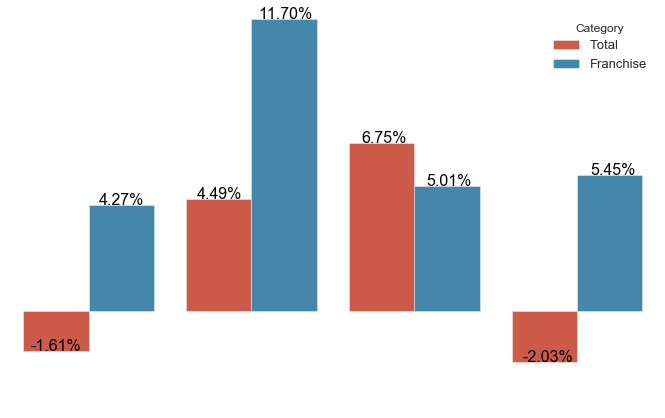

In [275]:
g = sns.barplot(data=total_fran, x = total_fran.index, y = 0, hue = 'Category')
ax=g

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate("{:.2%}".format(p.get_height()), (x,y),
         ha='center', fontsize=16, color='black', xytext=(x,y), textcoords='offset points')
plt.axis('off')

x = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Yongsan-gu']


# have the zero line

Text(0.5, 1.0, 'Percent Change in Total Stores 2015-2019')

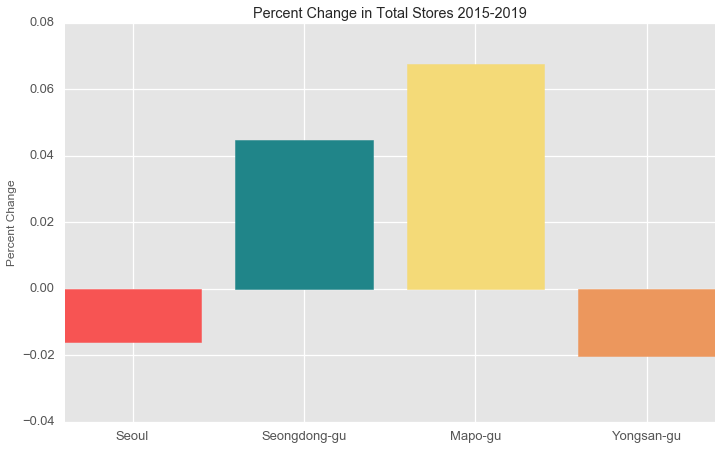

In [276]:
#fig, ax = plt.subplots()
plot2 = plt.bar(c_t.index, c_t[0])
plot2[0].set_color('#F75453')
plot2[1].set_color('#208589')
plot2[2].set_color('#F4DA78')
plot2[3].set_color('#EC975D')
plt.ylabel("Percent Change")
plt.title("Percent Change in Total Stores 2015-2019")

In [277]:
# this would actually be better visualized with an area chart that shows both the total number of franchise stores, and the total number of general store growth in each district.

In [278]:
fran_stores = franchise_stores.T

In [279]:
fran_stores.columns

Int64Index([1, 4, 7, 10, 13], dtype='int64')

In [280]:
fran_stores

,1,4,7,10,13
Year,2015,2016,2017,2018,2019
0,39103,40746,42004,41731,40773
4,1051,1108,1159,1187,1174
14,2017,2126,2230,2190,2118
3,973,1041,1046,1051,1026


In [281]:
nonfran_stores = nonfranchise_stores.T

In [282]:
nonfran_stores

,0,3,6,9,12
Year,2015,2016,2017,2018,2019
0,572646,576804,581955,572956,563435
4,15712,15953,16422,16505,16417
14,25764,26601,27464,27506,27504
3,18978,19089,19084,18911,18593


In [283]:
fran_stores.columns = ["2015", "2016", "2017", "2018", "2019"]
nonfran_stores.columns = ["2015", "2016", "2017", "2018", "2019"]

In [284]:
fran_stores

,2015,2016,2017,2018,2019
Year,2015,2016,2017,2018,2019
0,39103,40746,42004,41731,40773
4,1051,1108,1159,1187,1174
14,2017,2126,2230,2190,2118
3,973,1041,1046,1051,1026


In [285]:
nonfran_stores

,2015,2016,2017,2018,2019
Year,2015,2016,2017,2018,2019
0,572646,576804,581955,572956,563435
4,15712,15953,16422,16505,16417
14,25764,26601,27464,27506,27504
3,18978,19089,19084,18911,18593


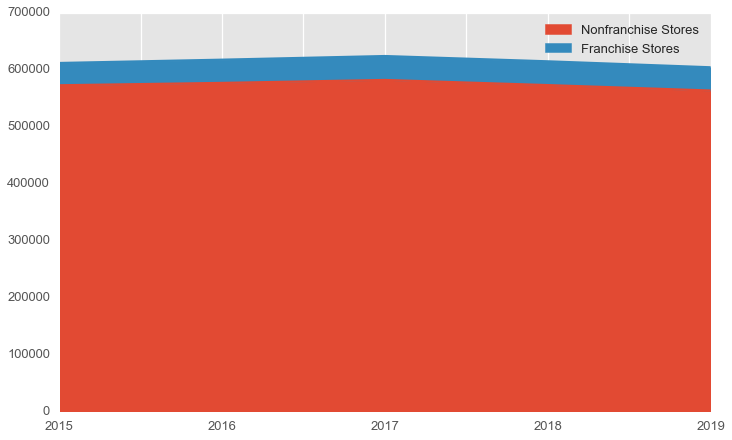

In [286]:
seoul_growth = pd.DataFrame({
    "Nonfranchise Stores": nonfran_stores.iloc[1, :].values,
    "Franchise Stores": fran_stores.iloc[1, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

seoul_growth.plot.area()

(0, 30000)

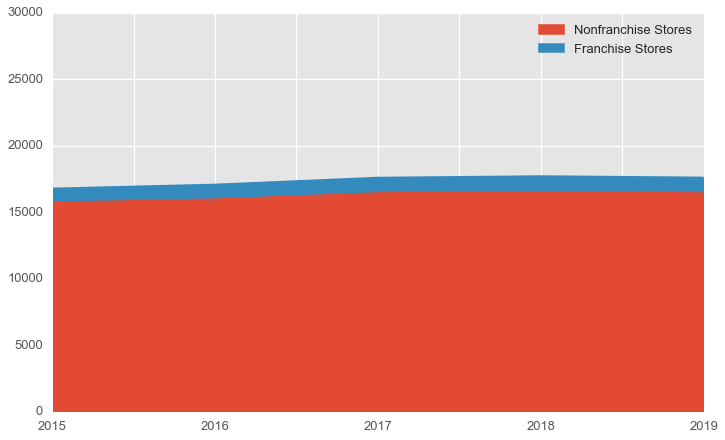

In [287]:
seongdong_growth = pd.DataFrame({
    "Nonfranchise Stores": nonfran_stores.iloc[2, :].values,
    "Franchise Stores": fran_stores.iloc[2, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

seongdong_growth.plot.area().set_ylim([0,30000])

(0, 30000)

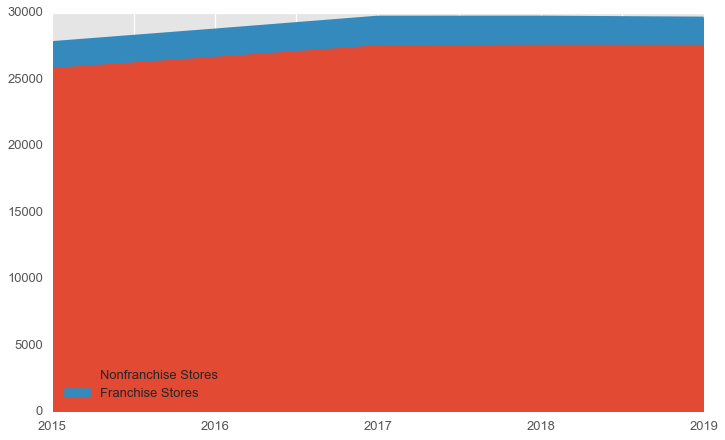

In [288]:
mapo_growth = pd.DataFrame({
    "Nonfranchise Stores": nonfran_stores.iloc[3, :].values,
    "Franchise Stores": fran_stores.iloc[3, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

mapo_growth.plot.area().set_ylim([0,30000])

(0, 30000)

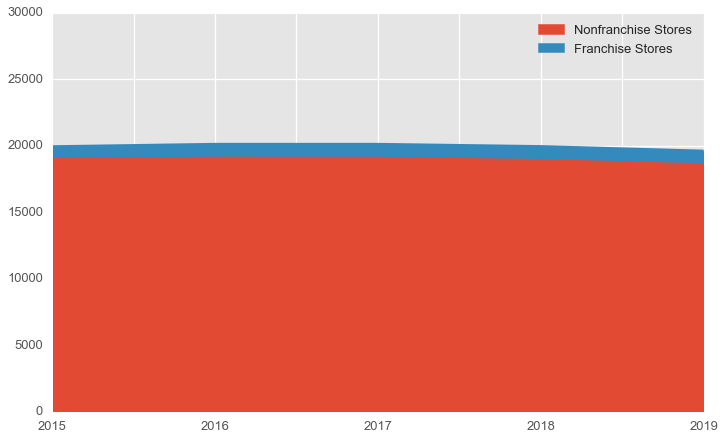

In [289]:
yongsan_growth = pd.DataFrame({
    "Nonfranchise Stores": nonfran_stores.iloc[4, :].values,
    "Franchise Stores": fran_stores.iloc[4, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

yongsan_growth.plot.area().set_ylim([0,30000])

In [290]:
##Case Study Neighborhoods

In [291]:
neighborhoods = pd.read_csv("Neighborhood Level Data Ver 2.csv")

In [292]:
neighborhoods

,District Name,Neighborhood Name,2016 Number of Coffee Shops,2019 Number of Coffee Shops,Percent Change in Number of Coffee Shops 2016-2019,2018 Aging Index Percentage,2015 Total Number of Stores,2015 Franchise Stores,2015 General Stores,16 Total Number of Stores,16 Franchise Stores,16 General Stores,17 Total Number of Stores,17 Franchise Stores,17 General Stores,Q2-18 Total Number of Stores,Q2-18 Franchise Stores,Q2-18 General Stores,Q2-19 Total Number of Stores,Q2-19 Franchise Stores,Q2-19 General Stores,% Change in Total Number of Storesg,% Change in Total Number Franchise Stores,% Change in Residential Pop (2015-2019),% Change in Work Population (2015-2019),Q2-15 Residential Population (persons per square mile),Q2-15 Work Population (persons per square mile),Q2-16 Residential Population (persons per square mile),Q2-16 Work Population (persons per square mile),Q2-17 Residential Population (persons per square mile),Q2-17 Work Population (persons per square mile),Q2-18 Residential Population (persons per square mile),Q2-18 Work Population (persons per square mile),Q2-19 Residential Population (persons per square mile),Q2-19 Work Population (persons per square mile),Q2-15 Number of Households,Q2-16 Number of Households x,Q2-17 Number of Households y,Q2-18 Number of Households z,Q2-19 Number of Households z,Q2-15 Monthly rent per 3.3 meters squared (KRW) a,Q2-16 Monthly rent per 3.3 meters squared (KRW) b,Q2-17 Monthly rent per 3.3 meters squared (KRW) c,Q2-18 Monthly rent per 3.3 meters squared (KRW) d,Q2-19 Monthly rent per 3.3 meters squared (KRW) e,% Change in Monthly Rent (2015-2019) f,Q2-15 Business Openings g,Q2-15 Business Closing h,Q2-15 Opening Rate (Percent) i,Q2-15 Closing Rate (Percent) j,Q2-16 Business Openings k,Q2-16 Business Closing l,Q2-16 Opening Rate (Percent) m,Q2-16 Closing Rate (Percent) n,Q2-17 Business Openings o,Q2-17 Business Closing p,Q2-17 Opening Rate (Percent) q,Q2-17 Closing Rate (Percent) r,Q2-18 Business Openings s,Q2-18 Business Closing t,Q2-18 Opening Rate (Percent) u,Q2-18 Closing Rate (Percent) v,Q2-19 Business Openings x,Q2-19 Business Closing x,Q2-19 Opening Rate (Percent) w,Q2-19 Closing Rate (Percent) z,Q2-15 Number of Households x,Q2-19 Number of Households b
0,Seongdong-gu,Wangsimni2-dong,9,14,0.555556,117.53,577,29,548,604,29,575,597,31,566,581,36,545,558,36,522,-0.032929,0.241379,0.331429,0.307692,90649.650,6733.974,91167.648,7251.972,112405.566,8028.969,121988.529,8287.968,120693.534,8805.966,"5,579","5,885","7,052","7,813","7,779","90,657","63,512","87,716","98,787","80,840",-0.11,35,24,6.1,4.2,32,20,5.3,3.3,22,20,3.7,3.4,22,23,3.8,4.0,24,17,4.3,3.0,"5,579","7,779"
1,Seongdong-gu,Wangsimnidoseondong,31,47,0.516129,104.86,"1,240",83,"1,157","1,285",90,"1,195","1,476",123,"1,353","1,522",140,"1,382","1,507",137,"1,370",0.215323,0.650602,1.174419,0.288889,44547.828,23309.910,42216.837,29007.888,94534.635,28230.891,97383.624,30043.884,96865.626,30043.884,"5,426","5,322","10,729","11,298","11,321","88,175","85,395","107,171","125,858","125,226",0.42,59,37,4.8,3.0,53,47,4.1,3.7,106,59,7.2,4.0,55,51,3.6,3.4,58,53,3.8,3.5,"5,426","11,321"
2,Seongdong-gu,Majang-dong,17,18,0.058824,156.00,"2,297",48,"2,249","2,327",50,"2,277","2,341",47,"2,294","2,271",44,"2,227","2,194",45,"2,149",-0.044841,-0.062500,-0.031390,0.175824,57756.777,23568.909,55943.784,24604.905,56720.781,26417.898,54907.788,27453.894,55943.784,27712.893,"10,142","10,101","10,281","10,324","10,623","91,883","90,483","101,383","108,446","122,319",0.33,61,55,2.7,2.4,76,39,3.3,1.7,64,58,2.7,2.5,25,45,1.1,2.0,21,39,1.0,1.8,"10,142","10,623"
3,Seongdong-gu,Sageun-dong,59,64,0.084746,182.50,800,129,671,828,145,683,832,157,675,818,153,665,804,155,649,0.005000,0.201550,0.125000,0.545455,22791.912,11395.956,24863.904,16057.938,24604.905,16575.936,24863.904,17093.934,25640.901,17611.932,"5,925","6,486","6,531","6,864","7,174","129,691","125,930","148,045","162,602","144,640",0.12,31,35,3.9,4.4,42,36,5.1,4.3,34,28,4.1,3.4,28,41,3.4,5.0,2

# Bar Chart of Franchise & Nonfranchise Businesses at Neighborhood Level

In [301]:
# Pull relevant data

fran_bus = neighborhoods.loc[[15,30,46], ['2015 Franchise Stores', '16 Franchise Stores', '17 Franchise Stores', 'Q2-18 Franchise Stores', 'Q2-19 Franchise Stores']]
nonfran_bus = neighborhoods.loc[[15,30,46], ['2015 General Stores', '16 General Stores', '17 General Stores', 'Q2-18 General Stores', 'Q2-19 General Stores']]

In [302]:
fran_bus.columns = ["2015", "2016", "2017", "2018", "20b19"]
nonfran_bus.columns = ["2015", "2016", "2017", "2018", "2019"]

In [303]:
fran_bus

,2015,2016,2017,2018,2019
15,304,317,320,335,326
30,672,697,716,690,649
46,114,125,124,121,107


In [304]:
fran_bus.T

,15,30,46
2015,304,672,114
2016,317,697,125
2017,320,716,124
2018,335,690,121
2019,326,649,107


In [305]:
fran_buscopy = fran_bus.T

In [306]:
fran_buscopy

,15,30,46
2015,304,672,114
2016,317,697,125
2017,320,716,124
2018,335,690,121
2019,326,649,107


In [314]:
fran_buscopy.columns

Index(['index', 15, 30, 46], dtype='object')

In [309]:
fran_buscopy = fran_buscopy.reset_index().rename(columns = {fran_buscopy.index.name : 'index'})

In [313]:
fran_buscopy

,index,15,30,46
0,2015,304,672,114
1,2016,317,697,125
2,2017,320,716,124
3,2018,335,690,121
4,2019,326,649,107


In [334]:
tfran_2015 = fran_buscopy[fran_buscopy['index'] == '2015'].iloc[:, 1:].values
tfran_2019 = fran_buscopy[fran_buscopy['index'] == '2019'].iloc[:, 1:].values
tfran_growth = (tfran_2019 - tfran_2015)/abs(tfran_2015)
tfran_growth 

neigh_totalfran = pd.DataFrame(tfran_growth) # just the list of totals
neigh_totalfran.columns = ['Seongsudong', 'Hongdae', 'Itaewon']

In [335]:
n_tf= neigh_totalfran.T
n_tf

,0
Seongsudong,0.072368
Hongdae,-0.034226
Itaewon,-0.061404


In [319]:
nonfran_bus

,2015,2016,2017,2018,2019
15,"4,628","4,778","4,969","5,068","5,160"
30,"7,885","8,266","8,594","8,642","8,706"
46,"2,317","2,416","2,426","2,384","2,334"


In [320]:
nf_buscopy = nonfran_bus.T

In [321]:
nf_buscopy

,15,30,46
2015,"4,628","7,885","2,317"
2016,"4,778","8,266","2,416"
2017,"4,969","8,594","2,426"
2018,"5,068","8,642","2,384"
2019,"5,160","8,706","2,334"


In [327]:
nf_buscopy.columns

Index(['index', 15, 30, 46], dtype='object')

In [323]:
nf_buscopy

,15,30,46
2015,"4,628","7,885","2,317"
2016,"4,778","8,266","2,416"
2017,"4,969","8,594","2,426"
2018,"5,068","8,642","2,384"
2019,"5,160","8,706","2,334"


In [324]:
nf_buscopy = nf_buscopy.reset_index().rename(columns = {nf_buscopy.index.name : 'index'})

In [339]:
tnf_2015 = nf_buscopy[nf_buscopy['index'] == '2015'].iloc[:, 1:].values
tnf_2019 = nf_buscopy[nf_buscopy['index'] == '2019'].iloc[:, 1:].values
tnf_growth = (int(tnf_2019) - int(tnf_2015))/abs(int(tnf_2015))
tnf_growth

neigh_tnf = pd.DataFrame(tnf_growth) # just the list of totals
neigh_tnf.columns = ['Seongsudong', 'Hongdae', 'Itaewon']

TypeError: only size-1 arrays can be converted to Python scalars

In [338]:
list_2015 = list(map(int, tnf_2015))

TypeError: only size-1 arrays can be converted to Python scalars

In [331]:
tnf_2015

array([[' 4,628 ', ' 7,885 ', ' 2,317 ']], dtype=object)

In [332]:
type(nf_buscopy[46].values[0])

str

In [85]:
fran_bus.columns = ["2015", "2016", "2017", "2018", "2019"]
nonfran_bus.columns = ["2015", "2016", "2017", "2018", "2019"]

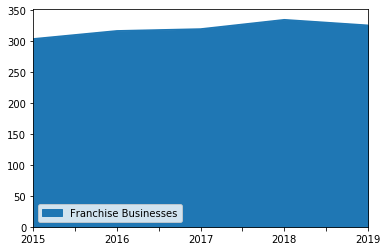

In [87]:
seongsudong_bus = pd.DataFrame({
    "Franchise Businesses": fran_bus.iloc[0, :].values,
    "Nonfranchise Businesses": nonfran_bus.iloc[0, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

seongsudong_bus.plot.area()

(0, 420000)

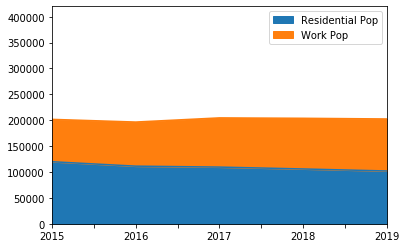

In [30]:
hongdae_pop = pd.DataFrame({
    "Residential Pop": res_pop.iloc[1, :].values,
    "Work Pop": work_pop.iloc[1, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

hongdae_pop.plot.area().set_ylim([0,420000])

(0, 420000)

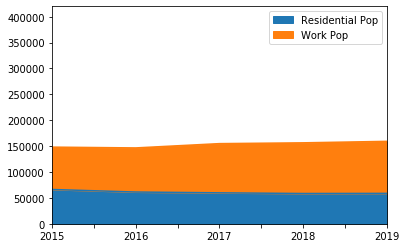

In [31]:
itaewon_pop = pd.DataFrame({
    "Residential Pop": res_pop.iloc[2, :].values,
    "Work Pop": work_pop.iloc[1, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

itaewon_pop.plot.area().set_ylim([0,420000])

# Residential and Work Population Density in Seoul (persons per square mile)

In [72]:
# Pull relevant data

res_ha = seoul.loc[[0,4,14,16,23], ['Q2-15 Residential Population (persons per ha)', 'Q2-16 Residential Population (persons per ha)', 'Q2-17 Residential Population (persons per ha)', 'Q2-18 Residential Population (persons per ha)', 'Q2-19 Residential Population (persons per ha)']]

work_ha = seoul.loc[[0,4,14,16,23], ['Q2-15 Work Population (persons per ha)', 'Q2-16 Work Population (persons per ha)', 'Q2-17 Work Population (persons per ha)', 'Q2-18 Work Population (persons per ha)', 'Q2-19 Work Population (persons per ha)']]

In [73]:
res_ha.columns = ["2015", "2016", "2017", "2018", "2019"]
work_ha.columns = ["2015", "2016", "2017", "2018", "2019"]

In [ ]:
#data is in persons per hectare so gotta convert it to persons per square mile

In [74]:
res_sq = res_ha * 258.999
res_sq

,2015,2016,2017,2018,2019
0,39108.849,37554.855,42216.837,41439.840,41439.840
4,40921.842,38849.850,47396.817,47655.816,48173.814
14,35741.862,34446.867,39885.846,39108.849,39108.849
16,31597.878,31338.879,36000.861,36000.861,35741.862
23,35482.863,33928.869,38072.853,36518.859,36777.858


In [75]:
work_sq = work_ha * 258.999
work_sq

,2015,2016,2017,2018,2019
0,19165.926,19942.923,20460.921,20978.919,21496.917
4,25122.903,26158.899,27971.892,29525.886,30043.884
14,21496.917,22014.915,23309.910,23309.910,23568.909
16,8028.969,10359.960,10618.959,11654.955,12172.953
23,52317.798,52317.798,52835.796,54648.789,55425.786


In [76]:
seoul_pop = pd.DataFrame({
    "Residential Pop": res_sq.iloc[0, :].values,
    "Work Pop": work_sq.iloc[0, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

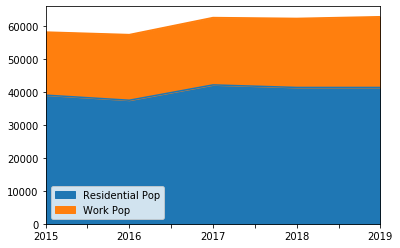

In [77]:
seoul_pop.plot.area()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


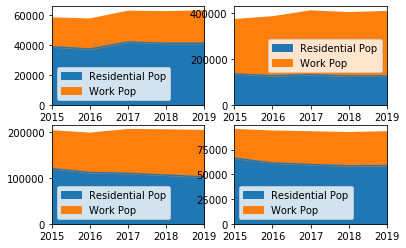

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad = 200.0)
seoul_pop.plot.area(ax = axes[0, 0])
Seongsudong_pop.plot.area(ax = axes[0, 1])
hongdae_pop.plot.area(ax = axes[1, 0])
itaewon_pop.plot.area(ax = axes[1, 1])

# Percent Change In Monthly Rent from 2015 to 2019 for Retail Spaces

In [81]:
#rents = seoul.loc[[0,4,14,16,23], ["Q2-15 Monthly rent per 3.3 meters squared (KRW)", 
             "Q2-19 Monthly rent per 3.3 meters squared (KRW)"]]

In [82]:
#rents

,Q2-15 Monthly rent per 3.3 meters squared (KRW),Q2-19 Monthly rent per 3.3 meters squared (KRW)
0,95907.0,117827.0
4,79230.0,106550.0
14,107943.0,119977.0
16,78935.0,106206.0
23,113218.0,132143.0


In [83]:
#rent_2015 = rents.iloc[:, 0].values
#rent_2019 = rents.iloc[:, 1].values
#rent_change = (rent_2019 - rent_2015)/abs(rent_2015)
#r_c_t = rent_change.T

Text(0.5, 1.0, 'Percent Change In Monthly Rent')

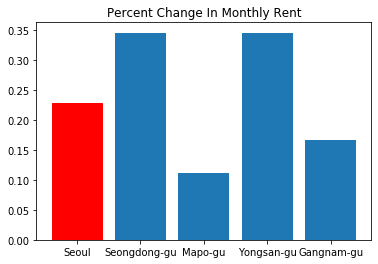

In [85]:
#plot3 = plt.bar(['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Yongsan-gu', 'Gangnam-gu'], r_c_t)
#plot3[0].set_color('red')
#plt.title("Percent Change In Monthly Rent")

# Archived

In [43]:
# Make new percent change tables
#total_pchange = pd.DataFrame()
# total = total_stores.iloc[:, 1:6].pct_change()
# total.index = ["2015", "2016", "2017", "2018", "2019"]
# total.columns = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Gangseo-gu', 'Gangnam-gu']
# total

In [44]:
# not what we wanted
#subset = total.iloc[1:, :]['Seoul']
#subset.plot(label = 'Seoul', color = 'black')
#y = np.arange(min(subset.values), max(subset.values), 0.01)
#plt.yticks(y)

#subset1 = total.iloc[1:, :]['Mapo-gu']
#subset1.plot(label = 'Mapo-gu', color = 'green')
#plt.title("Total Number of Stores")

In [ ]:
plt.plot(total_num['Year'], total_num.iloc[:, 1], color = 'red')
plt.plot(franchise_stores['Year'], franchise_stores.iloc[:, 1], color = 'blue')

#xticklabels(('2015','2016','2017','2018','2019'))

In [ ]:
# add one more for the other subplot
# https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-demo-py


# x = np.arange(1, 6)
# width = 0.3

# fig, ax = plt.subplots() # 2 rows, 2 columns
# fig.tight_layout(pad = 3.0)
# ax2 = ax.bar(x+width/2, general_num[0], width, label = 'General') 
# ax1 = ax.bar(x-width/2, franchise_stores[0], width, label = 'Franchise') 
# ax.set_xticklabels(general_num["Year"].values)

# ax[0, 0].plot(general_num['Year'], general_num.iloc[:, 1], color = 'red')
# ax[0, 0].plot(franchise_stores['Year'], franchise_stores.iloc[:, 1], color = 'blue')
# plt.xticks(rotation=70)

